In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
data=pd.read_csv("../data/mnist_train.csv")


In [15]:
data.head()

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [16]:
data = np.array(data)
m, n = data.shape
np.random.shuffle(data) 

data_dev = data[0:1000].T
Y_dev = data_dev[0]
X_dev = data_dev[1:n]
X_dev = X_dev / 255.

data_train = data[1000:m].T
Y_train = data_train[0]
X_train = data_train[1:n]
X_train = X_train / 255.
_,m_train = X_train.shape

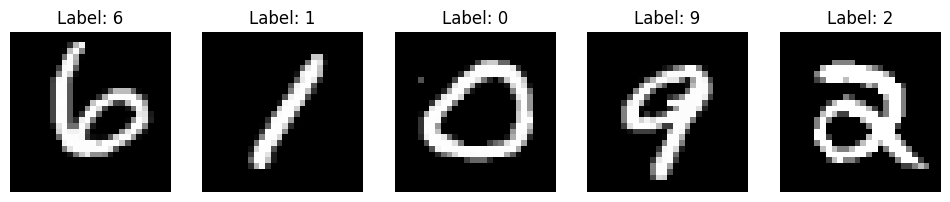

In [17]:
fig, axes = plt.subplots(1, 5, figsize=(12, 6))
for i, ax in enumerate(axes):
    ax.imshow(X_train[:, i].reshape(28, 28), cmap="gray")
    ax.set_title(f"Label: {int(Y_train[i])}")
    ax.axis("off")
plt.show()

In [26]:
def init_params():
    W1 = np.random.rand(10, 784) - 0.5
    b1 = np.random.rand(10, 1) - 0.5
    W2 = np.random.rand(10, 10) - 0.5
    b2 = np.random.rand(10, 1) - 0.5
    return W1, b1, W2, b2

def ReLU(Z):
    return np.maximum(Z, 0)

def softmax(Z):
    A = np.exp(Z) / sum(np.exp(Z))
    return A

def forward_prop(W1, b1, W2, b2, X):
    Z1 = W1.dot(X) + b1
    A1 = ReLU(Z1)
    Z2 = W2.dot(A1) + b2
    A2 = softmax(Z2)
    return Z1, A1, Z2, A2

def ReLU_deriv(Z):
    return Z > 0

def backward_prop(Z1, A1, Z2, A2, W1, W2, X, Y, m):
    one_hot_Y = one_hot(Y)
    dZ2 = A2 - one_hot_Y
    dW2 = 1 / m * dZ2.dot(A1.T)
    db2 = 1 / m * np.sum(dZ2, axis=1, keepdims=True)
    dZ1 = W2.T.dot(dZ2) * ReLU_deriv(Z1)
    dW1 = 1 / m * dZ1.dot(X.T)
    db1 = 1 / m * np.sum(dZ1, axis=1, keepdims=True)
    return dW1, db1, dW2, db2

def update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha):
    W1 = W1 - alpha * dW1
    b1 = b1 - alpha * db1
    W2 = W2 - alpha * dW2
    b2 = b2 - alpha * db2
    return W1, b1, W2, b2

In [27]:
def one_hot(Y):
    one_hot_Y = np.zeros((Y.size, Y.max() + 1))
    one_hot_Y[np.arange(Y.size), Y] = 1
    one_hot_Y = one_hot_Y.T
    return one_hot_Y

def get_predictions(A2):
    return np.argmax(A2, axis=0)

def get_accuracy(predictions, Y):
    return np.sum(predictions == Y) / Y.size

def normalize_data(X):
    return X / 255.0


def gradient_descent(X, Y, alpha, iterations):
    m = X.shape[1]
    W1, b1, W2, b2 = init_params()
    accuracy_list = []

    for i in range(iterations):
        Z1, A1, Z2, A2 = forward_prop(W1, b1, W2, b2, X)
        dW1, db1, dW2, db2 = backward_prop(Z1, A1, Z2, A2, W1, W2, X, Y, m)
        W1, b1, W2, b2 = update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha)
        
        if i % 10 == 0:
            predictions = get_predictions(A2)
            accuracy = get_accuracy(predictions, Y)
            accuracy_list.append(accuracy)
            print(f"Iteration: {i}, Accuracy: {accuracy * 100:.2f}%")

    return W1, b1, W2, b2, accuracy_list

In [28]:
alpha = 0.10
iterations = 500
W1, b1, W2, b2, accuracy_list = gradient_descent(X_train, Y_train, alpha, iterations)

Iteration: 0, Accuracy: 5.76%
Iteration: 10, Accuracy: 17.49%
Iteration: 20, Accuracy: 27.36%
Iteration: 30, Accuracy: 35.01%
Iteration: 40, Accuracy: 41.73%
Iteration: 50, Accuracy: 47.52%
Iteration: 60, Accuracy: 52.90%
Iteration: 70, Accuracy: 57.51%
Iteration: 80, Accuracy: 61.01%
Iteration: 90, Accuracy: 63.97%
Iteration: 100, Accuracy: 66.31%
Iteration: 110, Accuracy: 68.10%
Iteration: 120, Accuracy: 69.73%
Iteration: 130, Accuracy: 71.09%
Iteration: 140, Accuracy: 72.24%
Iteration: 150, Accuracy: 73.25%
Iteration: 160, Accuracy: 74.21%
Iteration: 170, Accuracy: 74.95%
Iteration: 180, Accuracy: 75.69%
Iteration: 190, Accuracy: 76.30%
Iteration: 200, Accuracy: 76.80%
Iteration: 210, Accuracy: 77.35%
Iteration: 220, Accuracy: 77.85%
Iteration: 230, Accuracy: 78.25%
Iteration: 240, Accuracy: 78.67%
Iteration: 250, Accuracy: 79.09%
Iteration: 260, Accuracy: 79.46%
Iteration: 270, Accuracy: 79.80%
Iteration: 280, Accuracy: 80.08%
Iteration: 290, Accuracy: 80.39%
Iteration: 300, Accura

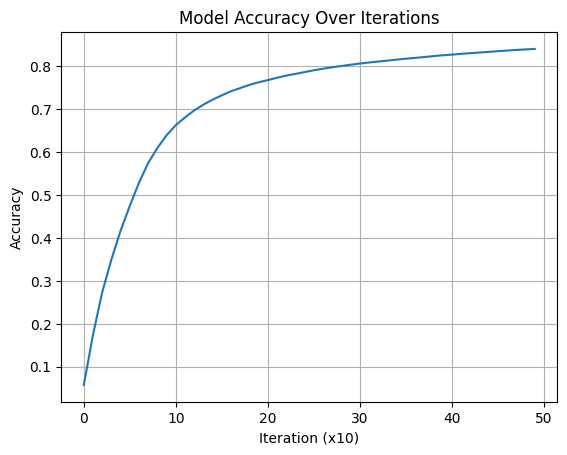

In [29]:
plt.plot(accuracy_list)
plt.title("Model Accuracy Over Iterations")
plt.xlabel("Iteration (x10)")
plt.ylabel("Accuracy")
plt.grid(True)
plt.show()

In [30]:
_, _, _, A2_dev = forward_prop(W1, b1, W2, b2, X_dev)
predictions_dev = get_predictions(A2_dev)
accuracy_dev = get_accuracy(predictions_dev, Y_dev)
print(f"Dev Set Accuracy: {accuracy_dev * 100:.2f}%")

Dev Set Accuracy: 86.30%


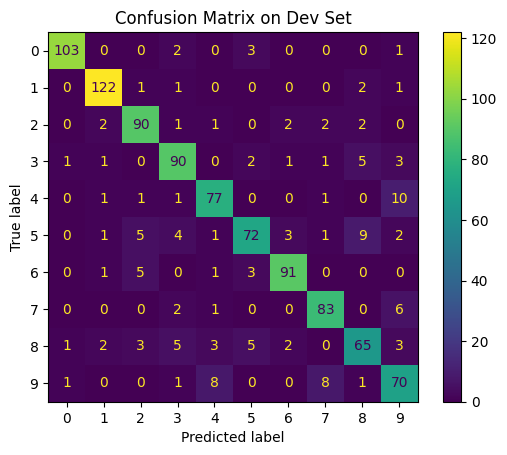

In [31]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

conf_matrix = confusion_matrix(Y_dev, predictions_dev)
disp = ConfusionMatrixDisplay(conf_matrix, display_labels=np.arange(10))
disp.plot(cmap="viridis")
plt.title("Confusion Matrix on Dev Set")
plt.show()

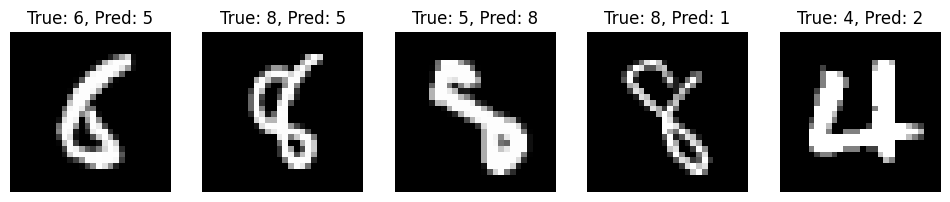

In [32]:
incorrect_indices = np.where(predictions_dev != Y_dev)[0]
fig, axes = plt.subplots(1, 5, figsize=(12, 6))
for i, ax in enumerate(axes):
    idx = incorrect_indices[i]
    ax.imshow(X_dev[:, idx].reshape(28, 28), cmap="gray")
    ax.set_title(f"True: {int(Y_dev[idx])}, Pred: {int(predictions_dev[idx])}")
    ax.axis("off")
plt.show()

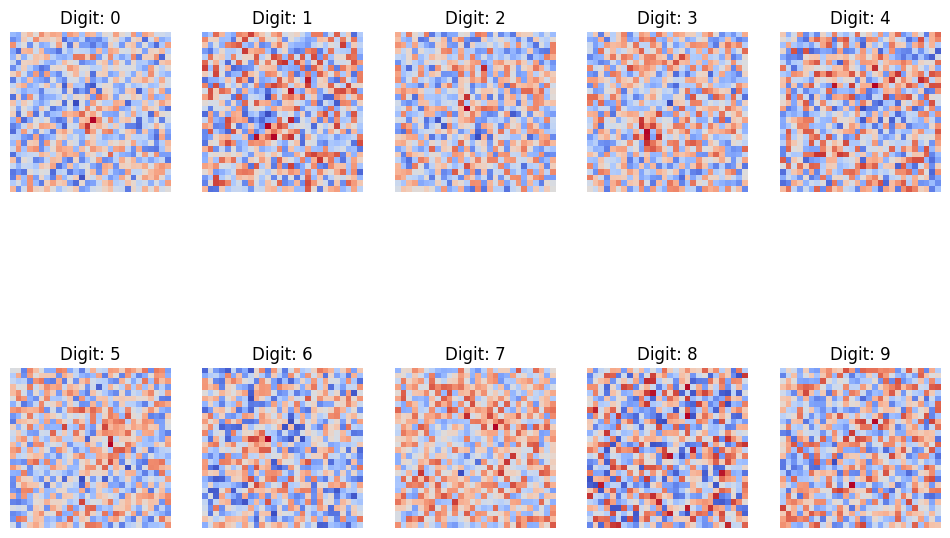

In [33]:
fig, axes = plt.subplots(2, 5, figsize=(12, 8))
for i, ax in enumerate(axes.flat):
    ax.imshow(W1[i, :].reshape(28, 28), cmap="coolwarm")
    ax.set_title(f"Digit: {i}")
    ax.axis("off")
plt.show()

In [34]:
def make_predictions(X, W1, b1, W2, b2):
    _, _, _, A2 = forward_prop(W1, b1, W2, b2, X)
    predictions = get_predictions(A2)
    return predictions

def test_prediction(index, W1, b1, W2, b2):
    current_image = X_train[:, index, None]
    prediction = make_predictions(X_train[:, index, None], W1, b1, W2, b2)
    label = Y_train[index]
    print("Prediction: ", prediction)
    print("Label: ", label)
    
    current_image = current_image.reshape((28, 28)) * 255
    plt.gray()
    plt.imshow(current_image, interpolation='nearest')
    plt.show()

Prediction:  [6]
Label:  6


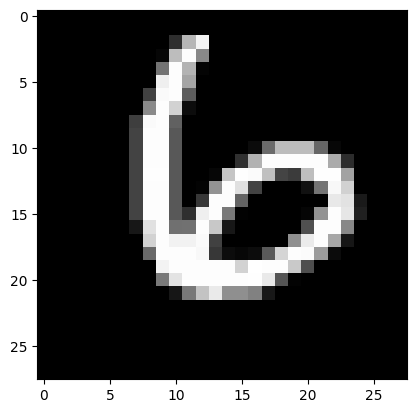

Prediction:  [1]
Label:  1


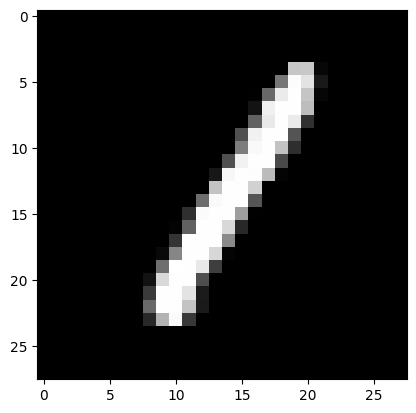

Prediction:  [0]
Label:  0


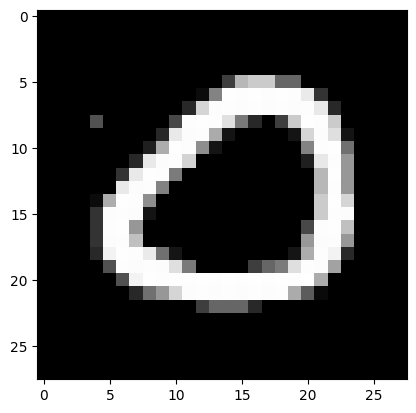

Prediction:  [9]
Label:  9


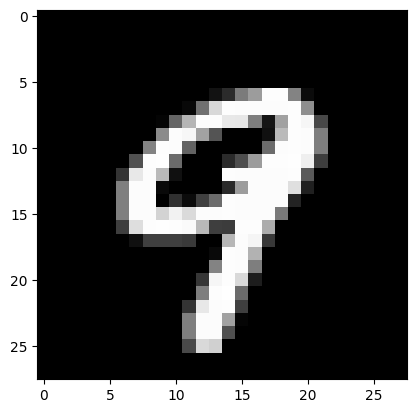

In [35]:
test_prediction(0, W1, b1, W2, b2)
test_prediction(1, W1, b1, W2, b2)
test_prediction(2, W1, b1, W2, b2)
test_prediction(3, W1, b1, W2, b2)

In [ ]:
dev_predictions = make_predictions(X_dev, W1, b1, W2, b2)
get_accuracy(dev_predictions, Y_dev)

[6 8 8 9 1 8 5 1 9 9 8 3 6 3 5 8 8 0 9 9 2 9 1 4 0 5 7 7 0 2 5 3 2 1 7 5 1
 2 0 0 6 2 8 8 0 6 3 5 2 8 6 6 6 2 6 2 9 3 4 3 5 5 9 8 7 3 9 8 4 3 2 3 1 0
 1 8 8 4 0 8 1 3 3 1 4 9 6 3 3 7 2 5 5 2 1 2 9 0 7 0 5 4 2 9 9 7 1 0 6 3 0
 9 5 2 6 4 4 0 5 7 1 6 8 3 8 4 8 2 1 0 8 3 2 1 4 6 8 5 4 0 8 4 2 0 1 5 9 7
 7 9 2 0 8 0 9 0 6 0 9 6 6 3 6 3 1 9 8 4 9 3 3 1 7 1 0 6 5 1 8 9 8 0 7 9 1
 1 4 5 6 2 3 6 2 6 2 5 8 2 5 5 4 3 2 2 4 8 1 5 7 5 3 7 9 2 0 7 3 7 1 6 1 0
 1 4 5 3 8 1 1 4 8 8 3 5 0 2 6 5 7 5 2 7 2 8 3 0 1 0 5 1 0 7 7 1 5 6 2 3 5
 6 0 9 3 1 2 8 1 9 6 1 0 2 1 4 2 7 1 3 5 4 2 3 3 6 8 0 6 6 6 8 2 1 8 5 0 1
 9 7 3 9 7 6 6 4 7 4 7 1 7 7 4 5 1 4 9 4 2 8 0 1 3 2 8 4 1 8 7 8 5 7 3 3 1
 9 0 2 2 1 9 2 2 8 2 7 9 1 0 0 9 1 2 3 0 9 0 7 6 7 1 0 8 1 7 4 3 0 0 3 1 6
 9 6 2 3 0 1 4 3 9 8 9 2 1 0 3 6 4 4 9 4 9 4 9 0 8 8 1 4 4 6 0 4 6 2 5 5 5
 4 3 9 2 8 3 6 6 4 2 8 5 2 7 2 4 3 6 6 8 3 2 9 4 4 0 4 9 5 7 3 1 5 2 9 1 7
 1 7 0 6 4 8 1 1 1 6 9 9 8 7 7 7 8 9 5 2 7 8 9 6 0 2 7 5 1 0 0 0 9 0 9 7 8
 3 1 5 7 0 2 5 4 4 8 8 0 

np.float64(0.853)